In [ ]:
# Install necessary packages
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.8 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=14518d86df0589464e4000226e9966d8e24cbab146ac79f33987fb65ac7afba4
  Stored in directory: /root/.cache/pip/wheels/1a/f3/a1/f7f10b5ae2c2459398762a3fcf4ac18c325311c7e3163d5a15
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11331 sha256=84f5062e402d8d0d40b63b7042141d8461b074c1f78ec381c9d761c0952b58b9
  Stored in directory: /root/.cache/pip/wheels/ea/e8/e0/79872972161e54486517ae507f94b2c7cea27fb7ef793bd415
Successfully built fancyimpute knnimpute


In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fancyimpute import IterativeImputer



SyntaxError: invalid syntax (<ipython-input-11-56fd909bba17>, line 5)

In [ ]:
# Step 1: Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
column_names = [f'V{i}' for i in range(1, 58)] + ['spam']
spambase = pd.read_csv(url, header=None, names=column_names)

In [ ]:
# Step 2: Explore the dataset for missing values
print("Missing values before imputation:")
print(spambase.isnull().sum())


Missing values before imputation:
V1      0
V2      0
V3      0
V4      0
V5      0
V6      0
V7      0
V8      0
V9      0
V10     0
V11     0
V12     0
V13     0
V14     0
V15     0
V16     0
V17     0
V18     0
V19     0
V20     0
V21     0
V22     0
V23     0
V24     0
V25     0
V26     0
V27     0
V28     0
V29     0
V30     0
V31     0
V32     0
V33     0
V34     0
V35     0
V36     0
V37     0
V38     0
V39     0
V40     0
V41     0
V42     0
V43     0
V44     0
V45     0
V46     0
V47     0
V48     0
V49     0
V50     0
V51     0
V52     0
V53     0
V54     0
V55     0
V56     0
V57     0
spam    0
dtype: int64


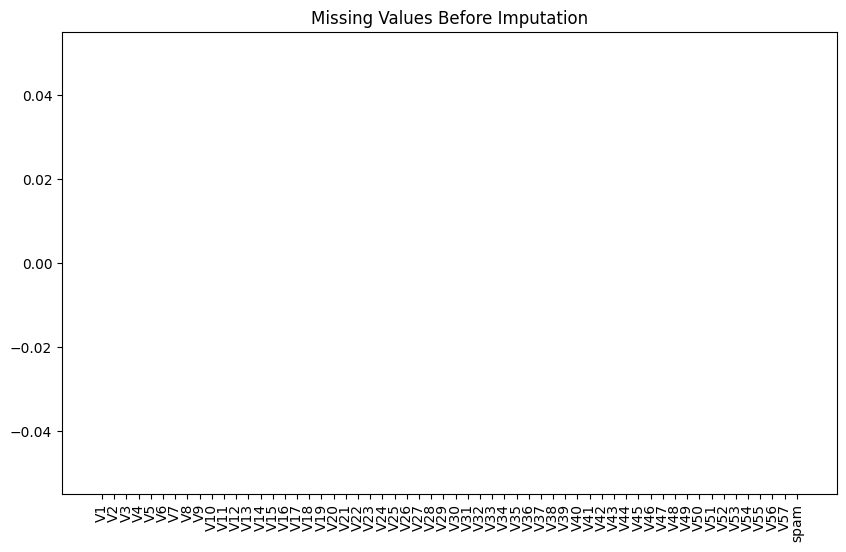

In [ ]:
# Visualize missing data
plt.figure(figsize=(10, 6))
plt.bar(spambase.columns, spambase.isnull().sum(), color='red')
plt.title('Missing Values Before Imputation')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Step 3: Mean imputation for numeric columns
spambase_mean_imputed = spambase.fillna(spambase.mean())

In [ ]:
# Step 4: Predictive Mean Matching (using Iterative Imputer)
imputer = IterativeImputer()
spambase_pmm_imputed = pd.DataFrame(imputer.fit_transform(spambase), columns=spambase.columns)


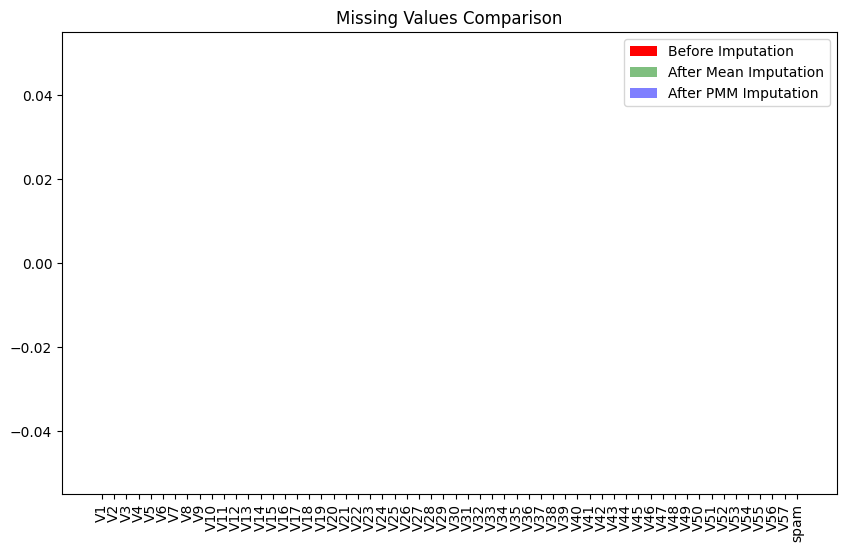

In [ ]:
# Step 5: Compare before and after imputation
plt.figure(figsize=(10, 6))
plt.bar(spambase.columns, spambase.isnull().sum(), color='red', label='Before Imputation')
plt.bar(spambase.columns, spambase_mean_imputed.isnull().sum(), color='green', alpha=0.5, label='After Mean Imputation')
plt.bar(spambase.columns, spambase_pmm_imputed.isnull().sum(), color='blue', alpha=0.5, label='After PMM Imputation')
plt.title('Missing Values Comparison')
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [ ]:
# Summary of imputed datasets
print("Summary after Mean Imputation:")
print(spambase_mean_imputed.describe())
print("\nSummary after PMM Imputation:")
print(spambase_pmm_imputed.describe())

Summary after Mean Imputation:
                V1           V2           V3           V4           V5  \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000   
mean      0.104553     0.213015     0.280656     0.065425     0.312223   
std       0.305358     1.290575     0.504143     1.395151     0.672513   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.420000     0.000000     0.380000   
max       4.540000    14.280000     5.100000    42.810000    10.000000   

                V6           V7           V8           V9          V10  ...  \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000  ...   
mean      0.095901     0.114208     0.105295     0.090067     0.239413  ...   
std       0.273824     0.391441     0.401071     0.278616     0.6